# Essential Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the Dataset:

Dataset from Data.gov.sg <br>
Source: https://data.gov.sg/dataset/resale-flat-prices <br>
File: resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv is used as it is the most recent data

In [2]:
houseData = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
houseData["flat_id"] = houseData.index
houseData.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,3
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,4


# Data Cleaning and Preprocessing:

In [3]:
def flat_type(x):
    if x == "1 ROOM":
        return 1
    elif x == "2 ROOM":
        return 2
    elif x == "3 ROOM":
        return 3
    elif x == "4 ROOM":
        return 4
    elif x == "5 ROOM":
        return 5
    elif x == "EXECUTIVE":
        return 6
    else:
        return 7    

In [4]:
def storey_range(x):
    return float(x[:2])

In [5]:
temp = houseData.groupby("flat_model").resale_price.median()
temp = temp.sort_values()
temp = temp.index
temp

Index(['2-room', 'Standard', 'New Generation', 'Simplified', 'Model A2',
       'Model A', 'Improved', 'Premium Apartment', 'Apartment', 'Maisonette',
       'Adjoined flat', 'Improved-Maisonette', 'Model A-Maisonette', 'DBSS',
       'Premium Maisonette', 'Multi Generation', 'Terrace',
       'Premium Apartment Loft', 'Type S1', 'Type S2'],
      dtype='object', name='flat_model')

In [6]:
T = {'2-room': 0, 'Standard': 1, 'New Generation': 2, 'Simplified': 3, 'Model A2': 4,
       'Model A': 5, 'Improved': 6, 'Premium Apartment': 7, 'Apartment': 8, 'Maisonette': 9,
       'Adjoined flat': 10, 'Improved-Maisonette': 11, 'Model A-Maisonette': 12, 'DBSS': 13,
       'Premium Maisonette': 14, 'Multi Generation': 15, 'Terrace': 16,
       'Premium Apartment Loft': 17, 'Type S1': 18, 'Type S2': 19}

In [7]:
def remaining_lease(x):
    years = float(x[:2])
    months = x[9:11]
    if months == '':
        months = 0
    else:
        months = float(months)
    
    return years + round((months/12),2)

In [8]:
df = houseData.copy()
df["flat_type"] = df["flat_type"].apply(lambda x: flat_type(x))
df["storey_range"] = df["storey_range"].apply(lambda x: storey_range(x))
df["flat_model"] = df["flat_model"].replace(T)
df["remaining_lease"] = df["remaining_lease"].apply(lambda x: remaining_lease(x))

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
0,2017-01,ANG MO KIO,2,406,ANG MO KIO AVE 10,10.0,44.0,6,1979,61.33,232000.0,0
1,2017-01,ANG MO KIO,3,108,ANG MO KIO AVE 4,1.0,67.0,2,1978,60.58,250000.0,1
2,2017-01,ANG MO KIO,3,602,ANG MO KIO AVE 5,1.0,67.0,2,1980,62.42,262000.0,2
3,2017-01,ANG MO KIO,3,465,ANG MO KIO AVE 10,4.0,68.0,2,1980,62.08,265000.0,3
4,2017-01,ANG MO KIO,3,601,ANG MO KIO AVE 5,1.0,67.0,2,1980,62.42,265000.0,4


# Data Visualisation:

In [9]:
df['town'].value_counts().sort_index()

ANG MO KIO          5285
BEDOK               6833
BISHAN              2445
BUKIT BATOK         4161
BUKIT MERAH         4887
BUKIT PANJANG       4920
BUKIT TIMAH          338
CENTRAL AREA        1050
CHOA CHU KANG       5691
CLEMENTI            2891
GEYLANG             3113
HOUGANG             6179
JURONG EAST         2669
JURONG WEST         8395
KALLANG/WHAMPOA     3684
MARINE PARADE        780
PASIR RIS           3919
PUNGGOL             9177
QUEENSTOWN          3599
SEMBAWANG           2934
SENGKANG           10647
SERANGOON           2415
TAMPINES            8494
TOA PAYOH           4028
WOODLANDS           8530
YISHUN              8400
Name: town, dtype: int64

In [10]:
df_vis = df.loc[:, ['town','resale_price']]
df_vis = df_vis.groupby('town').median()
df_vis = df_vis.reset_index()
df_vis.head()

,town,resale_price
0,ANG MO KIO,357000.0
1,BEDOK,383000.0
2,BISHAN,630000.0
3,BUKIT BATOK,375000.0
4,BUKIT MERAH,598000.0


By using CDXZipStream to find the coordinates of the towns:

In [11]:
town = ['ANG MO KIO',
'BEDOK',
'BISHAN',
'BUKIT BATOK',
'BUKIT MERAH',
'BUKIT PANJANG',
'BUKIT TIMAH',
'CENTRAL AREA',
'CHOA CHU KANG',
'CLEMENTI',
'GEYLANG',
'HOUGANG',
'JURONG EAST',
'JURONG WEST',
'KALLANG/WHAMPOA',
'MARINE PARADE',
'PASIR RIS',
'PUNGGOL',
'QUEENSTOWN',
'SEMBAWANG',
'SENGKANG',
'SERANGOON',
'TAMPINES',
'TOA PAYOH',
'WOODLANDS',
'YISHUN'
]

latitude = [1.37164998054504,
1.32425999641418,
1.35079002380371,
1.34951996803284,
1.28583002090454,
1.37876999378204,
1.34040999412537,
1.29166996479034,
1.38616001605988,
1.31438004970551,
1.31147003173828,
1.37114000320435,
1.3343700170517,
1.3394900560379,
1.31,
1.30306005477905,
1.37194001674652,
1.40245997905731,
1.2942,
1.44793999195099,
1.3868,
1.3554,
1.36819005012512,
1.33448004722595,
1.4382,
1.43621003627777
]

longitude = [103.845459,
103.9529572,
103.8510971,
103.7527695,
103.8190002,
103.7697678,
103.7722092,
103.8499985,
103.7461777,
103.7653732,
103.8821793,
103.8914413,
103.7436676,
103.7073898,
103.8651,
103.9079971,
103.9499435,
103.9068604,
103.7861,
103.8189087,
103.8914,
103.8679,
103.9294815,
103.8510818,
103.789,
103.8358231
]

df_vis['latitude'] = latitude
df_vis['longitude'] = longitude

df_vis

,town,resale_price,latitude,longitude
0,ANG MO KIO,357000.0,1.37165,103.845459
1,BEDOK,383000.0,1.32426,103.952957
2,BISHAN,630000.0,1.35079,103.851097
3,BUKIT BATOK,375000.0,1.34952,103.752769
4,BUKIT MERAH,598000.0,1.28583,103.819000
5,BUKIT PANJANG,438000.0,1.37877,103.769768
6,BUKIT TIMAH,713888.0,1.34041,103.772209
7,CENTRAL AREA,535000.0,1.29167,103.849998
8,CHOA CHU KANG,418000.0,1.38616,103.746178
9,CLEMENTI,438000.0,1.31438,103.765373


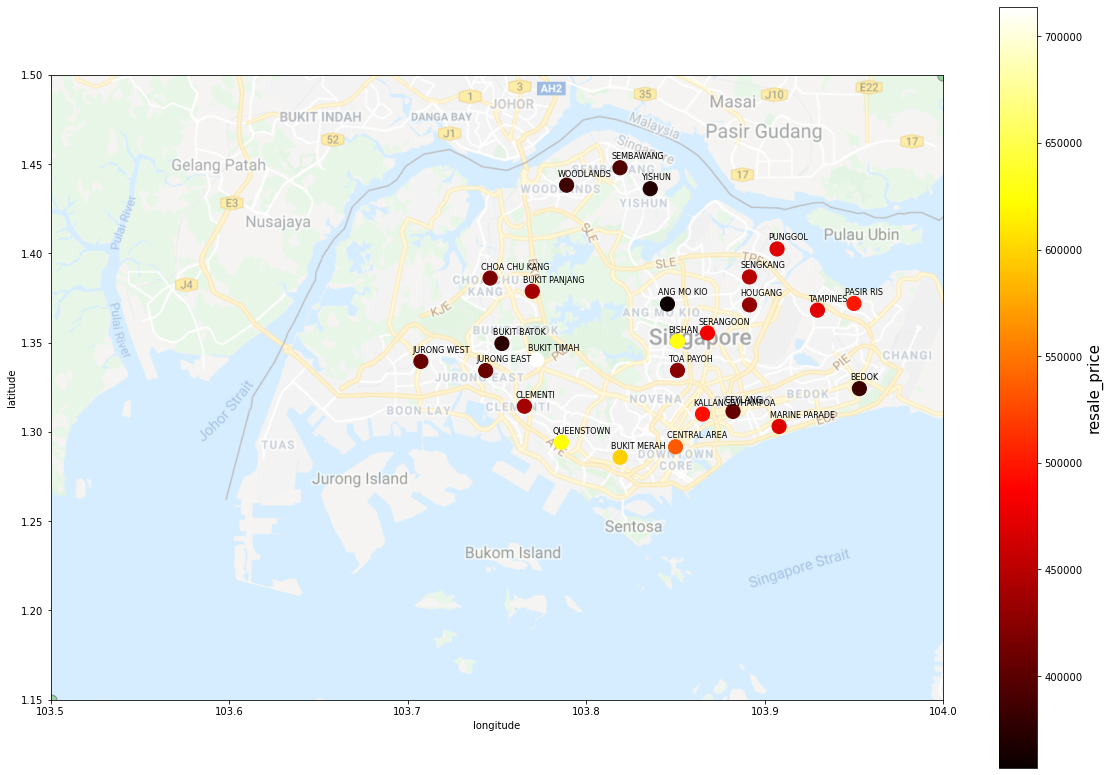

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import our image 
singapore_img = mpimg.imread('Singapore Map.png')
f, axes = plt.subplots(1, 1, figsize=(20,14))
# plot the data
types = df_vis['town']
x_coords = df_vis['longitude']
y_coords = df_vis['latitude']
z = df_vis['resale_price']

plt.scatter(x_coords, y_coords, marker='o', s=200 , c=z, cmap='hot',  alpha=10)

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i] 
    plt.text(x-0.005, y+0.005, type, fontsize=8)

clb=plt.colorbar()
clb.set_label('resale_price', fontsize=15)

# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("latitude", fontsize=10)
plt.xlabel("longitude", fontsize=10)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)

plt.show()

Flats at Bukit Merah, Kallang/Whampoa, Queenstown, Central Area are chosen for anomaly detection.

# Anomaly Detection:

In [13]:
df = df.set_index('town')
df = df.loc[['QUEENSTOWN','BUKIT MERAH','CENTRAL AREA','KALLANG/WHAMPOA'], :]
df = df.reset_index()

df.head()

,town,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
0,QUEENSTOWN,2017-01,3,83,C'WEALTH CL,1.0,60.0,1,1967,49.0,290000.0,765
1,QUEENSTOWN,2017-01,3,171,STIRLING RD,7.0,60.0,6,1970,52.5,299800.0,766
2,QUEENSTOWN,2017-01,3,153,MEI LING ST,7.0,67.0,6,1970,52.0,300000.0,767
3,QUEENSTOWN,2017-01,3,81,C'WEALTH CL,4.0,60.0,1,1967,49.0,307000.0,768
4,QUEENSTOWN,2017-01,3,169,STIRLING RD,10.0,60.0,6,1970,52.5,310000.0,769


In [14]:
features = ["flat_type", "storey_range", "floor_area_sqm", "flat_model", 
            "lease_commence_date", "remaining_lease", "resale_price"]

df_norm = df.copy()

for i in range(len(features)):
    column = features[i]
    df_norm[column] = (df_norm[column]-df_norm[column].min()) / (df_norm[column].max()-df_norm[column].min()) + 10**-10

df_norm.head()

,town,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id
0,QUEENSTOWN,2017-01,0.4,83,C'WEALTH CL,1.000000e-10,0.133028,1.000000e-10,1.000000e-10,0.095883,0.107964,765
1,QUEENSTOWN,2017-01,0.4,171,STIRLING RD,1.250000e-01,0.133028,2.777778e-01,5.769231e-02,0.160794,0.115920,766
2,QUEENSTOWN,2017-01,0.4,153,MEI LING ST,1.250000e-01,0.165138,2.777778e-01,5.769231e-02,0.151521,0.116082,767
3,QUEENSTOWN,2017-01,0.4,81,C'WEALTH CL,6.250000e-02,0.133028,1.000000e-10,1.000000e-10,0.095883,0.121764,768
4,QUEENSTOWN,2017-01,0.4,169,STIRLING RD,1.875000e-01,0.133028,2.777778e-01,5.769231e-02,0.160794,0.124200,769


In [58]:
df1 = pd.DataFrame(df["flat_id"])

<AxesSubplot:>

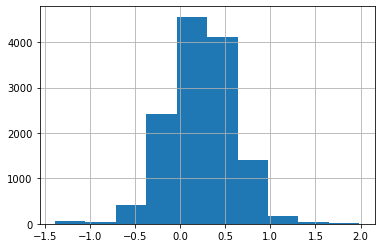

In [59]:
df1["x1"] = np.log((df_norm["flat_type"]**2)/df_norm["resale_price"]+0.25)
df1["x1"].hist(bins=10)

<AxesSubplot:>

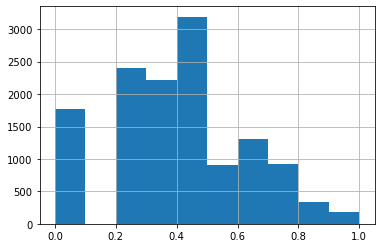

In [60]:
df1["x2"] = np.sqrt(df_norm["storey_range"])
df1["x2"].hist(bins=10)

<AxesSubplot:>

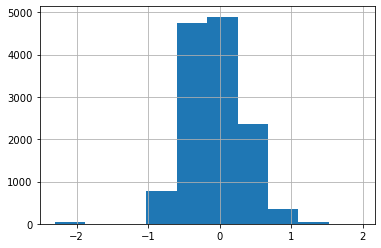

In [61]:
df1["x3"] = np.log(df_norm["floor_area_sqm"]/df_norm["resale_price"]+0.1)
df1["x3"].hist(bins=10)

<AxesSubplot:>

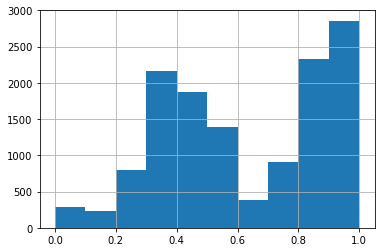

In [62]:
df1["x4"] = np.sqrt(df_norm["lease_commence_date"])
df1["x4"].hist(bins=10)

<AxesSubplot:>

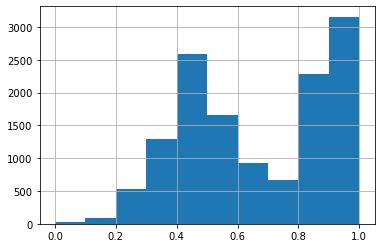

In [63]:
df1["x5"] = np.sqrt(df_norm["remaining_lease"])
df1["x5"].hist(bins=10)

<AxesSubplot:>

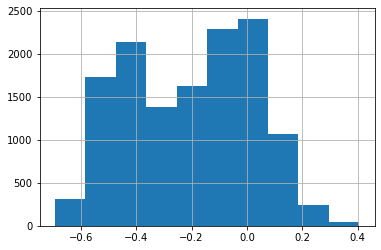

In [64]:
df1["x6"] = np.log(df_norm["resale_price"]+0.5)
df1["x6"].hist(bins=10)

In [65]:
df1.head()

,flat_id,x1,x2,x3,x4,x5,x6
0,765,0.549260,0.000010,0.286790,0.000010,0.309649,-0.497639
1,766,0.488744,0.353553,0.221210,0.240192,0.400991,-0.484639
2,767,0.487559,0.353553,0.420417,0.240192,0.389257,-0.484375
3,768,0.447256,0.250000,0.176053,0.000010,0.309649,-0.475194
4,769,0.430645,0.433013,0.157926,0.240192,0.400991,-0.471285


In [66]:
import scipy.stats

def est_parameter(dataset):
    mu = np.mean(dataset)
    sigma = np.std(dataset)
    return mu, sigma

def calculate_p(x, mu, sigma):
    return scipy.stats.norm(mu, sigma).pdf(x)

n = 6
for i in range(1, n+1):
    mu, sigma = est_parameter(df1["x"+str(i)])
    df1["p"+str(i)] = df1["x"+str(i)].apply(lambda x: calculate_p(x, mu, sigma))


In [69]:
df1.head()

,flat_id,x1,x2,x3,x4,x5,x6,p1,p2,p3,p4,p5,p6
0,765,0.549260,0.000010,0.286790,0.000010,0.309649,-0.497639,0.757410,0.362609,0.670775,0.091527,0.555901,0.758169
1,766,0.488744,0.353553,0.221210,0.240192,0.400991,-0.484639,0.863677,1.725407,0.764521,0.524520,0.919976,0.815531
2,767,0.487559,0.353553,0.420417,0.240192,0.389257,-0.484375,0.865658,1.725407,0.473270,0.524520,0.869617,0.816709
3,768,0.447256,0.250000,0.176053,0.000010,0.309649,-0.475194,0.929839,1.407891,0.823762,0.091527,0.555901,0.858131
4,769,0.430645,0.433013,0.157926,0.240192,0.400991,-0.471285,0.954198,1.749094,0.845812,0.524520,0.919976,0.875961


In [70]:
df1["px"] = df1["p1"]*df1["p2"]*df1["p3"]*df1["p4"]*df1["p5"]*df1["p6"]

df1.head()

,flat_id,x1,x2,x3,x4,x5,x6,p1,p2,p3,p4,p5,p6,px
0,765,0.549260,0.000010,0.286790,0.000010,0.309649,-0.497639,0.757410,0.362609,0.670775,0.091527,0.555901,0.758169,0.007107
1,766,0.488744,0.353553,0.221210,0.240192,0.400991,-0.484639,0.863677,1.725407,0.764521,0.524520,0.919976,0.815531,0.448344
2,767,0.487559,0.353553,0.420417,0.240192,0.389257,-0.484375,0.865658,1.725407,0.473270,0.524520,0.869617,0.816709,0.263333
3,768,0.447256,0.250000,0.176053,0.000010,0.309649,-0.475194,0.929839,1.407891,0.823762,0.091527,0.555901,0.858131,0.047085
4,769,0.430645,0.433013,0.157926,0.240192,0.400991,-0.471285,0.954198,1.749094,0.845812,0.524520,0.919976,0.875961,0.596691


In [71]:
anomaly = df1[df1["px"] < 10**-4]
anomaly = anomaly.sort_values("flat_id")
anomaly

,flat_id,x1,x2,x3,x4,x5,x6,p1,p2,p3,p4,p5,p6,px
3694,2572,-1.386294,0.000010,-2.302585,0.392232,0.494217,-0.625665,0.000047,0.362609,2.014025e-07,1.029891,1.317368,0.309985,1.437504e-12
3695,2573,-1.386294,0.000010,-2.302585,0.392232,0.494217,-0.598715,0.000047,0.362609,2.014025e-07,1.029891,1.317368,0.384279,1.782032e-12
3836,6324,-1.386294,0.353553,-2.302585,0.392232,0.491017,-0.600193,0.000047,1.725407,2.014025e-07,1.029891,1.304616,0.379917,8.302056e-12
9745,6971,1.378491,0.000010,1.017223,0.277350,0.404903,-0.610603,0.007440,0.362609,2.593577e-02,0.637909,0.936889,0.350144,1.464181e-05
9817,8844,1.378491,0.000010,1.017223,0.240192,0.389257,-0.610603,0.007440,0.362609,2.593577e-02,0.524520,0.869617,0.350144,1.117476e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,100826,1.247372,0.000010,0.882084,0.240192,0.291764,-0.598715,0.021938,0.362609,6.069712e-02,0.524520,0.494891,0.384279,4.816354e-05
2384,105477,1.057106,0.353553,0.826367,0.000010,0.152258,-0.578245,0.083373,1.725407,8.339737e-02,0.091527,0.163966,0.448133,8.068172e-05
8150,117903,-1.386294,0.250000,-2.302585,0.392232,0.391158,-0.622634,0.000047,1.407891,2.014025e-07,1.029891,0.877733,0.317790,3.812367e-12
8151,117904,-1.386294,0.353553,-2.302585,0.392232,0.389257,-0.584051,0.000047,1.725407,2.014025e-07,1.029891,0.869617,0.429371,6.254245e-12


In [72]:
P = {"pmin":[], "pmax":[], "pmean":[]}

for i in range(1, n+1):
    P["pmin"].append(df1["p"+str(i)].min())
    P["pmax"].append(df1["p"+str(i)].max())
    P["pmean"].append(df1["p"+str(i)].mean())

pdata = pd.DataFrame(P)
pdata

,pmin,pmax,pmean
0,8.857849e-06,1.103785,0.793680
1,5.322834e-02,1.749094,1.248709
2,2.014025e-07,0.991521,0.708463
3,9.152696e-02,1.515639,0.993729
4,3.290614e-02,1.693933,1.097560
5,4.723693e-02,1.762193,1.169553


In [73]:
anomaly_df = anomaly.loc[:, ["flat_id", "px"]]
anomaly_df = anomaly_df.set_index("flat_id")

result = df.join(anomaly_df, on="flat_id", how="inner")
result

,town,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_id,px
937,QUEENSTOWN,2018-09,2,91,C'WEALTH DR,4.0,48.0,1,1967,47.33,188000.0,36037,0.000077
1062,QUEENSTOWN,2018-11,2,91,C'WEALTH DR,7.0,48.0,1,1967,47.17,185000.0,39880,0.000030
1063,QUEENSTOWN,2018-11,3,86,C'WEALTH CL,1.0,58.0,1,1967,47.17,235000.0,39881,0.000084
1253,QUEENSTOWN,2019-04,2,83,C'WEALTH CL,1.0,46.0,1,1967,46.83,185000.0,47726,0.000015
1420,QUEENSTOWN,2019-07,2,83,C'WEALTH CL,4.0,46.0,1,1967,46.50,185000.0,53703,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11703,KALLANG/WHAMPOA,2020-08,3,32,JLN BAHAGIA,1.0,53.0,1,1971,49.50,215000.0,76571,0.000073
11704,KALLANG/WHAMPOA,2020-08,3,35,JLN BAHAGIA,4.0,56.0,1,1971,49.50,202000.0,76572,0.000003
11705,KALLANG/WHAMPOA,2020-08,3,32,JLN BAHAGIA,4.0,56.0,1,1971,49.50,213000.0,76573,0.000084
11706,KALLANG/WHAMPOA,2020-08,3,34,JLN BAHAGIA,7.0,56.0,1,1970,48.83,203000.0,76574,0.000003


In [74]:
#take 3 room flat type as example:
temp1 = df[df["flat_type"]==3]
temp1 = df.groupby(["floor_area_sqm"]).resale_price.median()
temp1 = pd.DataFrame(temp1)
temp1.head(30)

,resale_price
floor_area_sqm,
31.0,185000.0
34.0,206500.0
35.0,210000.0
39.0,185000.0
41.0,239000.0
42.0,227000.0
43.0,220000.0
44.0,224000.0
45.0,228000.0


In [75]:
temp2 = result[result["flat_type"]==3]
temp2 = result.groupby(["floor_area_sqm"]).resale_price.mean()
temp2
# generally, 3 room flats in the anomaly set have lower resale_price

floor_area_sqm
31.0    188789.568627
34.0    273000.000000
43.0    175000.000000
46.0    184250.000000
47.0    178333.333333
48.0    186500.000000
53.0    203257.142857
55.0    211000.000000
56.0    203675.421053
58.0    222400.000000
59.0    207500.000000
60.0    222648.285714
63.0    220000.000000
65.0    211200.000000
66.0    200000.000000
67.0    230000.000000
68.0    245000.000000
76.0    225000.000000
Name: resale_price, dtype: float64

<AxesSubplot:xlabel='flat_model', ylabel='resale_price'>

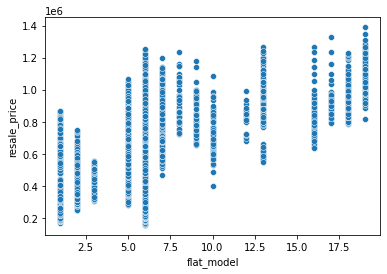

In [48]:
#appendix:
import seaborn as sb
sb.scatterplot(x= df["flat_model"], y=df["resale_price"])

In [49]:
from scipy import stats
stats.pearsonr(df["flat_model"], df["resale_price"])

(0.47846491112350653, 0.0)